# Définition et premier exemple

**Définition:**

**Une fonction est dite récursive si elle s'appelle elle même.**

**Exemple:**

Les deux fonctions suivantes calculent la puissance $n$-ieme de $x$ en utilisant uniquement l'opération multiplication.

La première fonction utilise un algorithme "habituel" avec une méthode itérative basée sur une boucle for.

In [1]:
def puissance_iterative(x,n) :
    resultat = 1
    for i in range(n):
        resultat = x*resultat
    return resultat

On peut alors tester cette fonction en calculant $2^8$

In [2]:
test_iteratif = puissance_iterative(2,8)
print(test_iteratif)

256


La deuxième fonction utilise un algorithme récursif qui s'appelle lui même.

In [3]:
def puissance_recursive(x,n) :
    if n==0 :
        resultat = 1
        return resultat
    else :
        resultat = x*puissance_recursive(x,n-1)
        return resultat

In [4]:
test_recursif = puissance_recursive(2,8)
print(test_recursif)

256


Les deux fonctions donnent le même résultat mais fonctionne différement.

**Méthode itérative:**

La fonction itérative réalise une boucle en calculant dans l'ordre :

- 1 
- puis $1 \times 2 = 2$
- puis $2 \times 2=4$
- puis $4 \times 2 = 8$
- puis ...

Elle stocke la valeur du résultat dans un nombre à chaque tour de boucle, et retourne en fin de boucle le résultat final.

**Méthode récursive:**

La fonction récursive appelle les calculs dans l'ordre inverse :

- si je connais le résultat de $2^7$ alors je dois calculer $2 \times 2^7 = 2^8$
- si je connais le résultat de $2^6$ alors je dois calculer $2 \times 2^6 = 2^7$
- si je connais le résultat de $2^5$ alors je dois calculer $2 \times 2^5 = 2^6$
- si ...
- si je connais le résultat de $2^0$ alors je dois calculer $2 \times 2^0 = 2^1$
- je connais le résultat de $2^0$ c'est $1$
- donc je peux calculer $2^1 = 2 \times 2^0 = 2 \times 1 = 2$
- donc je peux calculer $2^2 = 2 \times 2^1 = 2 \times 2 = 4$
- donc ...
- donc je peux calculer $2^8 = 2 \times 128 = 256$

# Pile d'appel, critère d'arrêt et terminaison

On reconnait une structure de pile dans l'appel récursif d'une fonction :

- la pile d'appel est vide
- j'empile : "je dois calculer 2 $\times$ puissance_recursive(2,7)"
- j'empile : "je dois calculer 2 $\times$ puissance_recursive(2,6)"
- j'empile : "je dois calculer 2 $\times$ puissance_recursive(2,5)"
- j'empile : ...
- je connais puissance_recursive(2,0) = 1
- je dépile l'appel suivant "je dois calculer 2 $\times$ puissance_recursive(2,0)" et je calcule : puissance_recursive(2,1) = 2 $\times$ 1 = 2
- je dépile l'appel suivant "je dois calculer 2 $\times$ puissance_recursive(2,1)" et je calcule : puissance_recursive(2,1) = 2 $\times$ 1 = 2
- je dépile : ...
- je dépile l'appel suivant "je dois calculer 2 $\times$ puissance_recursive(2,7)" et je calcule : puissance_recursive(2,8) = 2 $\times$ 128 = 256
- la pile d'appel est vide, j'ai finit le résultat est 256.

Le critère qui nous informe quand on doit arrêter d'empiler de nouveaux appels et passer à dépiler c'est lorsque l'on rencontre ce que l'on appelle **le cas d'arrêt**, ici $2^0$, dont on connait la valeur à retourner, ici 1. Lors de l'écriture d'une fonction récursive il faut bien s'assurer que les appels successifs rencontrent le cas d'arrêt, ici l'exposant $k$ de $2^k$ diminue de 1 à chaque appel, pour assurer **la terminaison du programme**.

Par exemple la fonction puissance_recursive($x$,$n$) écrite plus haut ne se termine jamais pour des valeurs de $n$ non entière ou négative, on dit que la terminaison du programme n'est pas assuré pour ces valeurs.

# Exercice d'application :

Ecrire deux fonctions prenant en argument un entier positif $n$, qui retournent factorielle n ,$n!$. Une fonction utilisera une méthode itérative et l'autre une méthode récursive. Tester vos deux fonctions.

# Récursivité et récurrence

On remarque qu'une fonction récursive est liée à la notion de suite définie par récurrence.

Une suite définie par récurrence est une suite définie par son ou ses premiers termes et par une relation de récurrence, qui définie chaque terme à partir du ou des précédents.

Par exemple la suite $(u_n)$ telle que :

$u_0 = 2$

et

$u_n = \dfrac{1}{2}\left(u_{n-1}+\dfrac{3}{u_{n-1}}\right)$

est définie par récurrence.

Le premier terme correspond au cas d'arrêt, si n = 0 alors la valeur de $u_n$ est connue, c'est $u_0 = 2$.

La relation de récurrence, correspond à l'appel de la fonction par elle même, $u_n$ est exprimée en fonction de $u_{n-1}$.

Enfin à chaque relation de récurrence l'indice de la suite diminue de 1, on atteint donc bien le cas d'arrêt qui est $u_0 = 2$ après $n$ appel de la relation de récurrence, la terminaison du programme est assurée.

**Exercice:**

Ecrire une fonction récursive qui prend en argument un indice $n$ et retourne le terme de la série $u_n$. Testez votre fonction pour les premières valeurs de la suite et remarquez qu'elle converge rapidement vers $\sqrt{3}$.

# Exercice: 

On définit la fonction suivante qui repère dans le plan complexe les affixes des quatres sommets d'un carré.

In [5]:
def carre(a, b):
    return [a, b, b - 1j * (a - b), a + 1j * (b - a), a]

On peut alors tracer un carré avec la librairie matplotlib en reliant les quatres coins du carré.

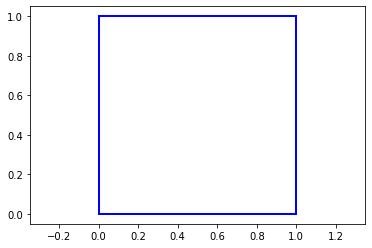

In [7]:
import matplotlib.pyplot as plt
L = carre(1, 1 + 1j)
plt.axis('equal')
for a in L:
    plt.plot([a.real for a in L], [a.imag for a in L], 'b', lw=2)
plt.show()

Écrire une fonction récursive qui permet d’obtenir la figure suivante

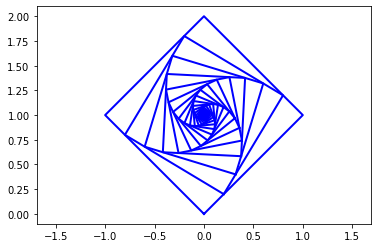

À partir d’un segment $[a, b]$ où a et b sont complexes, on trace le segment $[a,\dfrac{1}{4}(3a + b)]$ puis on recommence avec a $\leftarrow$  a et b $\leftarrow a + \dfrac{1}{2}(b - a)e^i$ ; a $\leftarrow$  a et b $\leftarrow a+ \dfrac{1}{2}(b - a)e^{ -i}$ et enfin a $\leftarrow \dfrac{1}{4}(3a+b)$ et b  $\leftarrow$  b.

Tracer la figure en partant de a = 0 et b = 2.